In [1]:
pip install numpy pandas scikit-learn matplotlib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
# Importar librerías a utilizar
import numpy as np
import pandas as pd
import os
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Leer carpeta donde está ubicado el dataset en nuestro ordenador.
os.chdir(r'C:\Users\AndrésMauricioValenc\Desktop\UNAD\ANALISIS DE DATOS\Tarea 3\Anexo 2 - Dataset Vehicle')

In [4]:
# Leer el dataset Vehicle
df_vehicle = pd.read_csv('car data.csv')

In [5]:
# Procedemos a revisar el tipo de datos que tiene cada columna
df_vehicle.dtypes

Car_Name          object
Year               int64
Selling_Price    float64
Present_Price    float64
Kms_Driven         int64
Fuel_Type         object
Seller_Type       object
Transmission      object
Owner              int64
dtype: object

In [6]:
# Procedemos a revisar si las columnas tienen valores nulos.
print(df_vehicle.isnull().sum())

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64


In [7]:
# Añadir columna con el año actual para hacer comparativo de cuantos años de vejez tienen los vehiculos
df_vehicle['current_year']=2024
df_vehicle['years_old'] = df_vehicle['current_year'] - df_vehicle['Year']

In [8]:
# Eliminar columna current_year
df_vehicle = df_vehicle.drop(columns=['current_year'])

In [9]:
# Eliminamos la columna name, ya que no haremos relevancia del nombre del carro
df_vehicle = df_vehicle.drop(columns='Car_Name')

In [10]:
df_vehicle.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,years_old
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,10
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,11
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,7
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,13
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,10


In [11]:
df_vehicle.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner,years_old
count,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189,10.372093
std,2.891554,5.082812,8.644115,38886.883882,0.247915,2.891554
min,2003.000000,0.100000,0.320000,500.000000,0.000000,6.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000,8.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000,10.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000,12.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000,21.000000


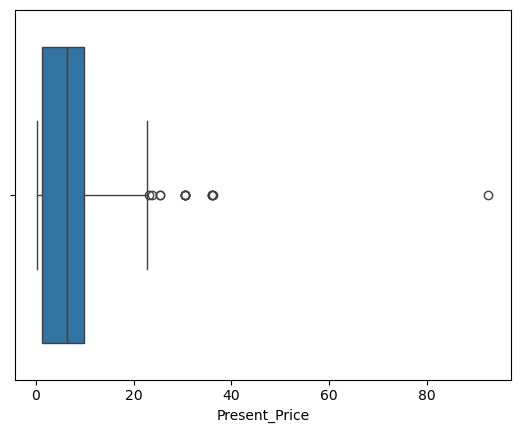

In [12]:
# Procedemos a identificar valores atipicos de la columna year: año
sns.boxplot(x=df_vehicle['Present_Price'])
plt.show()

In [13]:
# Una forma común de detectar valores atípicos es usando el rango intercuartílico (IQR)
# Calcular el IQR
Q1 = df_vehicle['Present_Price'].quantile(0.25)
Q3 = df_vehicle['Present_Price'].quantile(0.75)
IQR = Q3 - Q1

# Definir límites inferior y superior
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Procederemos a filtrar el dataset con los datos que estén más centralizados
filtrado_dataset = df_vehicle[(df_vehicle['Present_Price'] >= lower_bound) & (df_vehicle['Present_Price'] <= upper_bound)].copy()

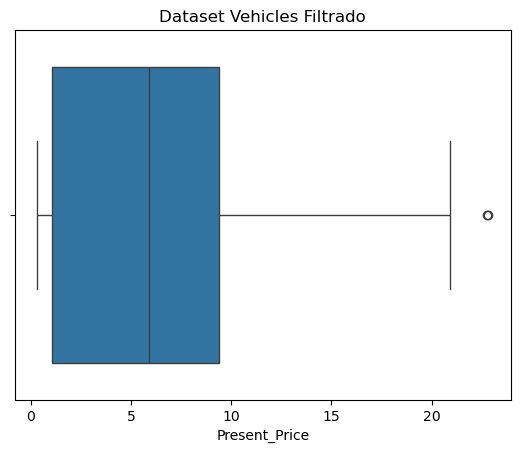

In [14]:
# Boxplot del dataset filtrado
sns.boxplot(x=filtrado_dataset['Present_Price'])
plt.title('Dataset Vehicles Filtrado')
plt.show()

In [15]:
# Conteo de filas del dataset filtrado
filtrado_dataset.shape

(287, 9)

In [16]:
# Conteo de filas del dataset original
df_vehicle.shape

(301, 9)

In [17]:
# Cambiamos de nombre del dataset filtrado asignando otro nuevo
dataset_veh = filtrado_dataset.copy()

In [18]:
# Transformación de las columnas categóricas

# Se verifican la cantidad de valores unicos en cada columna categórica
print(dataset_veh['Fuel_Type'].nunique())
print(dataset_veh['Seller_Type'].nunique())
print(dataset_veh['Transmission'].nunique())

3
2
2


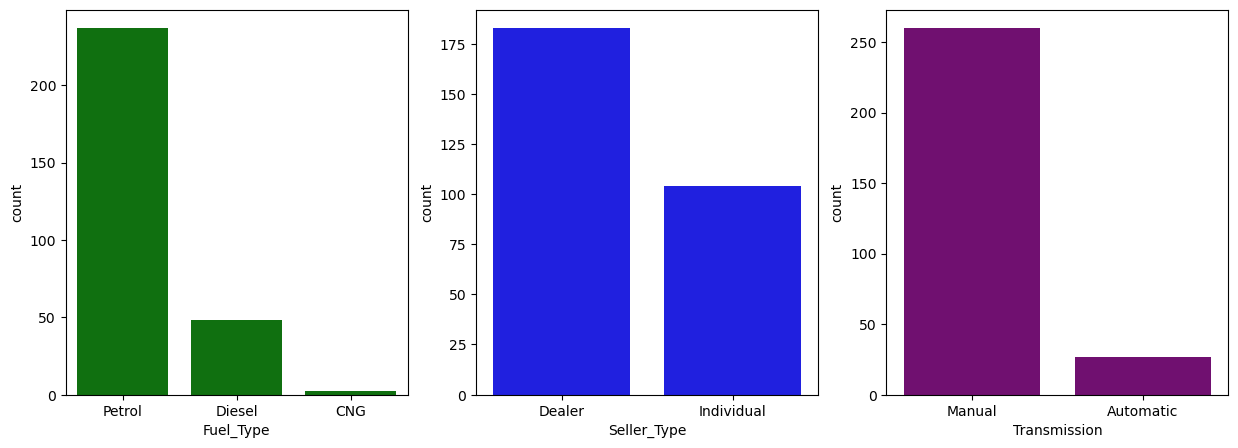

In [19]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.countplot(x='Fuel_Type', data=dataset_veh, color='green')

plt.subplot(1, 3, 2)
sns.countplot(x='Seller_Type', data=dataset_veh, color='blue')

plt.subplot(1, 3, 3)
sns.countplot(x='Transmission', data=dataset_veh, color='purple')

plt.show()

In [20]:
# Codificación de la columna "fuel" sin inplace
dataset_veh = dataset_veh.replace({"Fuel_Type": {"Petrol": 0, "Diesel": 1, "CNG": 2}})

# Codificación de la columna "seller_type"
dataset_veh = dataset_veh.replace({"Seller_Type": {"Dealer": 0, "Individual": 1}})

# Codificación de la columna "transmission"
dataset_veh = dataset_veh.replace({"Transmission": {"Manual": 0, "Automatic": 1}})

C:\Users\AndrésMauricioValenc\AppData\Local\Temp\ipykernel_17740\2163808555.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset_veh = dataset_veh.replace({"Fuel_Type": {"Petrol": 0, "Diesel": 1, "CNG": 2}})
C:\Users\AndrésMauricioValenc\AppData\Local\Temp\ipykernel_17740\2163808555.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset_veh = dataset_veh.replace({"Seller_Type": {"Dealer": 0, "Individual": 1}})
C:\Users\AndrésMauricioValenc\AppData\Local\Temp\ipykernel_17740\2163808555.py:8: FutureWarning: Downcasting b

In [21]:
# Verificamos los cambios
dataset_veh.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,years_old
0,2014,3.35,5.59,27000,0,0,0,0,10
1,2013,4.75,9.54,43000,1,0,0,0,11
2,2017,7.25,9.85,6900,0,0,0,0,7
3,2011,2.85,4.15,5200,0,0,0,0,13
4,2014,4.60,6.87,42450,1,0,0,0,10


In [22]:
dataset_2 = dataset_veh.drop(columns='Selling_Price')

<Axes: title={'center': 'Correlación'}>

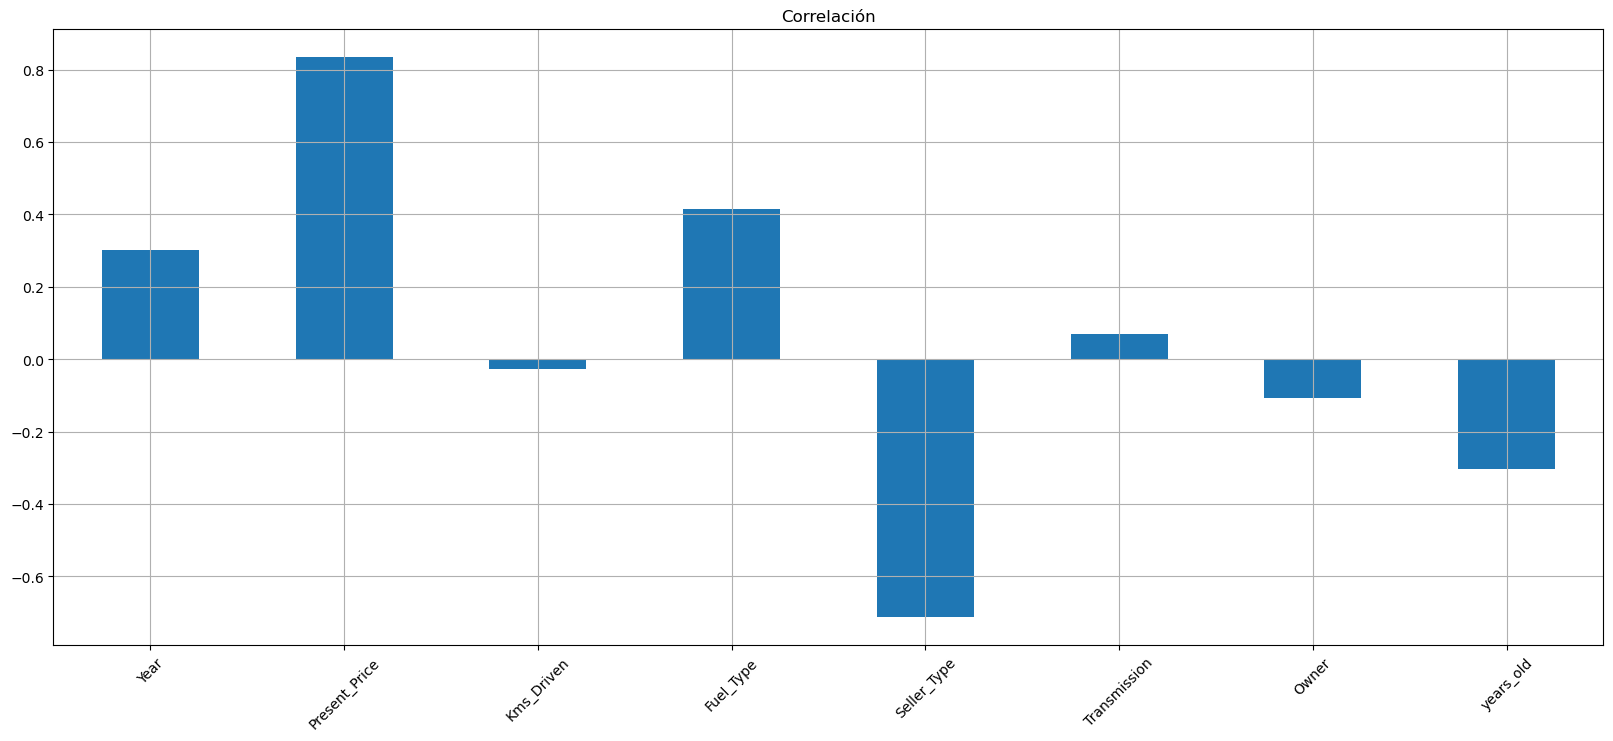

In [23]:
dataset_2.corrwith(dataset_veh['Selling_Price']).plot.bar(
    figsize=(20,8), title = 'Correlación',
    rot = 45, grid = True
)

In [24]:
# Varibles dependientes e independientes:
X = dataset_veh.drop(['Selling_Price'], axis=1)
y = dataset_veh['Selling_Price']

In [25]:
# Pasamos a dividir el conjunto de datos en entrenamiento y prueba
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [26]:
scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [27]:
# Creación de modelo de regresión lineal
modelo = LinearRegression()

# Ajustar el modelo a los datos
modelo.fit(x_train, y_train)

LinearRegression()

In [28]:
pred = modelo.predict(x_test)

In [29]:
print("R2 score: ", (metrics.r2_score(pred, y_test))) # Coeficiente de determinación R²
print("MAE: ", (metrics.mean_absolute_error(pred, y_test))) # Error Absoluto Medio
print("MSE: ", (metrics.mean_squared_error(pred, y_test))) # Error Cuadrático Medio

R2 score:  0.822830650660003
MAE:  1.0384631134427307
MSE:  1.7934381998633795


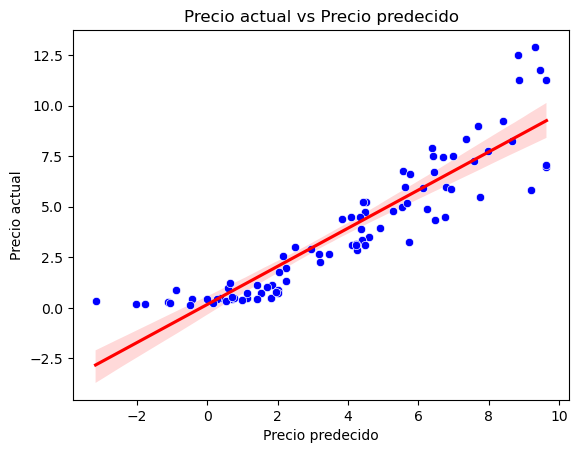

In [30]:
sns.regplot(x=pred, y=y_test, color='red', scatter=False) # Linea de regresión (Datos predecidos)
sns.scatterplot(x=pred, y=y_test, color='blue') # Datos reales
plt.xlabel("Precio predecido")
plt.ylabel('Precio actual')
plt.title("Precio actual vs Precio predecido")
plt.show()